## User churn prediction

In order to identify the customers who tend to stop using survices, some models would be used. Besides, the reasons for the churn would be analyzed.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('./churn.all')

In [7]:
print(df.shape)
df.head()

(5000, 21)


,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
df.isna().any()

state                            False
account_length                   False
area_code                        False
phone_number                     False
intl_plan                        False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churned                          False
dtype: bool

In [9]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [11]:
df['intl_plan'] = df['intl_plan'].map(lambda x:x.strip())
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x:x.strip())
df['churned'] = df['churned'].map(lambda x:x.strip())
df['churned'] = df['churned'].map(lambda x:x.strip('.'))
df['phone_number'] = df['phone_number'].map(lambda x:x.strip())

In [12]:
df['phone_number'][1]

'371-7191'

For the description of the dataset, there are 21 variables in this dataset while 5000 samples in total. No missing value was found.

(array([  28.,   40.,  236.,  663., 1235., 1488.,  922.,  295.,   77.,
          16.]),
 array([0.  , 0.54, 1.08, 1.62, 2.16, 2.7 , 3.24, 3.78, 4.32, 4.86, 5.4 ]),
 <a list of 10 Patch objects>)

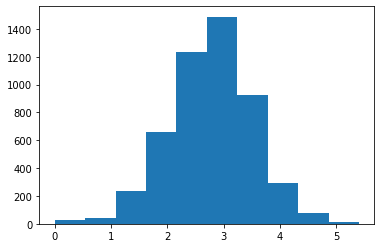

In [13]:
plt.hist(df['total_intl_charge'])

(array([   2.,   42.,  220.,  737., 1412., 1404.,  851.,  275.,   49.,
           8.]),
 array([ 0.   ,  1.777,  3.554,  5.331,  7.108,  8.885, 10.662, 12.439,
        14.216, 15.993, 17.77 ]),
 <a list of 10 Patch objects>)

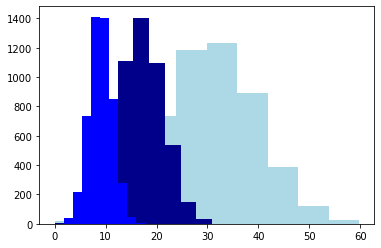

In [14]:
plt.hist(df['total_day_charge'], color = 'lightblue')
plt.hist(df['total_eve_charge'], color = 'darkblue')
plt.hist(df['total_night_charge'], color = 'blue')

In [15]:
df_corr = df[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge']].corr()
df_corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.026949,0.000391,-0.000156,0.000368


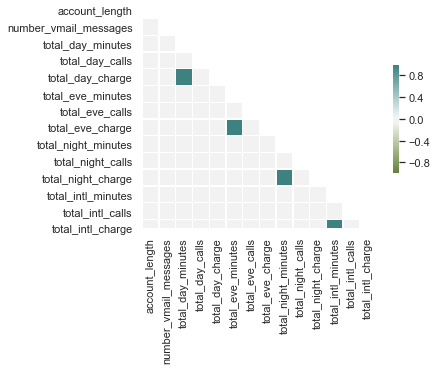

In [16]:
sns.set(style = "white")
mask = np.zeros_like(df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(110, 550, as_cmap = True)
sns.heatmap(df_corr,mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0, 
            square = True, linewidths = 0.3, cbar_kws = {"shrink": 0.5})

"total charge" is highly corrlated with "total minutes", correlation coefficient is nearly 1.

### Classification

In [17]:
import pandas as pd
import os
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from keras.utils import to_categorical

# help function
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    if target_type in (np.int64, np.int32):
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_
    
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    # Regression
    return df[result].values.astype(np.float32), df[[target]].values.astype(np.float32)

Using TensorFlow backend.


#### Binary classification

In [18]:
df['y'] = df['churned'].apply(lambda x: 1 if x == 'True' else 0)
df['intl_plan'] = df['intl_plan'].apply(lambda x: 1 if x == 'yes' else 0)
df['voice_mail_plan'] = df['voice_mail_plan'].apply(lambda x: 1 if x == 'yes' else 0)
df = df.drop(['area_code', 'phone_number', 'churned'],axis = 1)

In [19]:
l = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls','total_day_charge', 
     'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls', 
     'total_night_charge', 'total_intl_minutes', 'total_intl_calls','total_intl_charge', 
     'number_customer_service_calls']

for i in l:
    encode_numeric_zscore(df,i)

encode_text_dummy(df,'state')
encode_text_index(df,'y')
x = df.drop('y',axis = 1)

y = to_categorical(df['y'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12) 

In [20]:
model= Sequential()
model.add(Dense(200, input_dim=x.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weights.hdf5')


pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Final accuracy: {}".format(score))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 00010: early stopping
Final accuracy: 0.929


In [21]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
print('Confusion matrix')
print(cm)

Confusion matrix
[[831  30]
 [ 41  98]]


In [22]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
precision = tp / (tp + fp + 0.0)
recall = tp / (tp + fn + 0.0)
print("accuracy of pred is: ",accuracy)
print("precision of pred is: ",round(precision,3))
print("recall of pred is: ",round(recall,3))

accuracy of pred is:  0.929
precision of pred is:  0.766
recall of pred is:  0.705


In [23]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

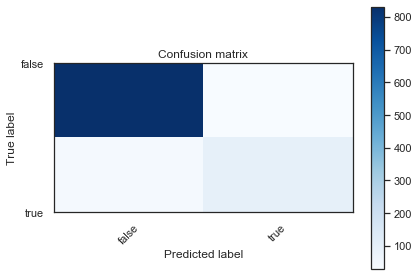

In [24]:
name = ['false','true']
plt.figure()
plot_confusion_matrix(cm,name)

#### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
x_feature = ['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls']
df_feature = df[x_feature]
df_feature_y = df['y']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_feature_y, test_size=0.2, random_state=4) 

In [28]:
model_logistic_l1 = LogisticRegression(penalty = 'l1')
model_logistic_l1.fit(x_train,y_train)
coef1 = model_logistic_l1.coef_[0]

print('model coefficient for l1 penalty:')
for i in range(len(x_feature)):
    print(x_feature[i],":",round(coef1[i],4))  

model coefficient for l1 penalty:
account_length : 0.0955
intl_plan : 2.0361
voice_mail_plan : -1.8104
number_vmail_messages : 0.3208
total_day_minutes : 0.2289
total_day_calls : 0.0265
total_day_charge : 0.4618
total_eve_minutes : 0.1913
total_eve_calls : -0.0261
total_eve_charge : 0.1607
total_night_minutes : 0.197
total_night_calls : -0.0224
total_night_charge : 0.0
total_intl_minutes : 0.1455
total_intl_calls : -0.1495
total_intl_charge : 0.1332
number_customer_service_calls : 0.667


/miniconda3/envs/python3.6/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
y_pred_log_l1 = model_logistic_l1.predict_proba(x_test)
pred_l1 = np.argmax(y_pred_log_l1,axis=1)
score = metrics.accuracy_score(y_test, pred_l1)
print("Final accuracy: {}".format(score))

Final accuracy: 0.877


In [30]:
model_logistic_l2 = LogisticRegression(penalty = 'l2')
model_logistic_l2.fit(x_train,y_train)
coef2 = model_logistic_l2.coef_[0]

print('model coefficient for l1 penalty:')
for i in range(len(x_feature)):
    print(x_feature[i],":",round(coef2[i],4))  
    

model coefficient for l1 penalty:
account_length : 0.0976
intl_plan : 2.0148
voice_mail_plan : -1.7529
number_vmail_messages : 0.3008
total_day_minutes : 0.3519
total_day_calls : 0.0287
total_day_charge : 0.3386
total_eve_minutes : 0.176
total_eve_calls : -0.0286
total_eve_charge : 0.1773
total_night_minutes : 0.1157
total_night_calls : -0.0248
total_night_charge : 0.0827
total_intl_minutes : 0.1234
total_intl_calls : -0.1516
total_intl_charge : 0.157
number_customer_service_calls : 0.6659


/miniconda3/envs/python3.6/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
y_pred_log_l2 = model_logistic_l2.predict_proba(x_test)
pred_l2 = np.argmax(y_pred_log_l2,axis=1)
score = metrics.accuracy_score(y_test, pred_l2)
print("Final accuracy: {}".format(score))

Final accuracy: 0.877
